# Working with surfaces in napari using napari-pymeshlab

In [1]:
import napari
from napari.utils import nbscreenshot
import numpy as np

from skimage.measure import regionprops
from skimage.measure import marching_cubes
from skimage.data import cells3d
from skimage.measure import label

from napari_pymeshlab import convex_hull, \
                             laplacian_smooth, \
                             taubin_smooth, \
                             simplification_clustering_decimation, \
                             colorize_curvature_apss, \
                             make_shell

We'll start with a napari viewer and a surface layer

In [2]:
viewer = napari.Viewer(ndisplay=3)

def hide_all(viewer):
    for layer in viewer.layers:
        layer.visible = False
        
def show_all(viewer):
    for layer in viewer.layers:
        layer.visible = True

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded
Plugin 'napari-accelerated-pixel-and-object-classification' provided a non-callable type to `napari_experimental_provide_function`: <class 'magicgui._magicgui.MagicFactory'>. Function widget ignored.


Alternative shading modes are only available in 3D, defaulting to none


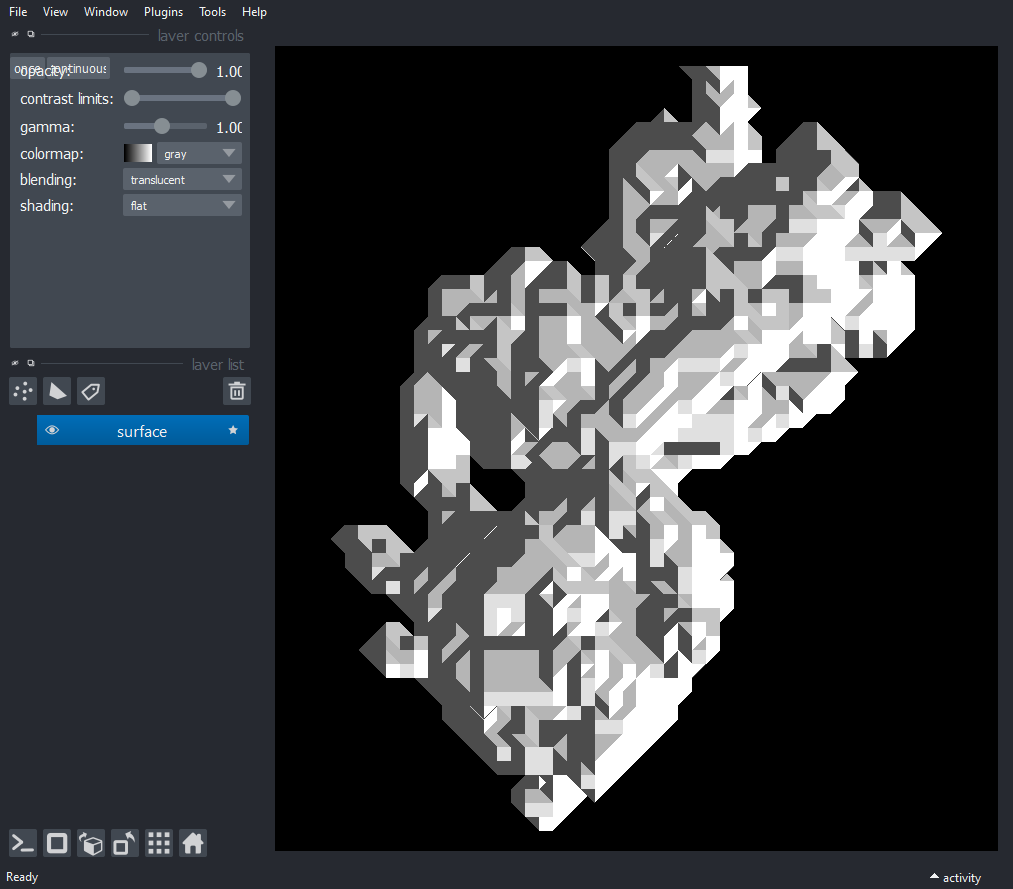

In [3]:
# load example data and segment / label it
nuclei = cells3d()[:,1,60:120,30:80]
labels = label(nuclei>20000)

# find larges label
statistics = regionprops(labels)
label_index = np.argmax([r.area for r in statistics])
labels_list = [r.label for r in statistics]
label_id = labels_list[label_index]

# turn it into a surface
binary = np.asarray(labels == label_id)
vertices, faces, normals, values = marching_cubes(binary, 0)
surface = (vertices, faces, values)

# attach it to the viewer
surface_layer = viewer.add_surface(surface)

nbscreenshot(viewer)

## Filtering surfaces
### Convex hull of a surface

Alternative shading modes are only available in 3D, defaulting to none


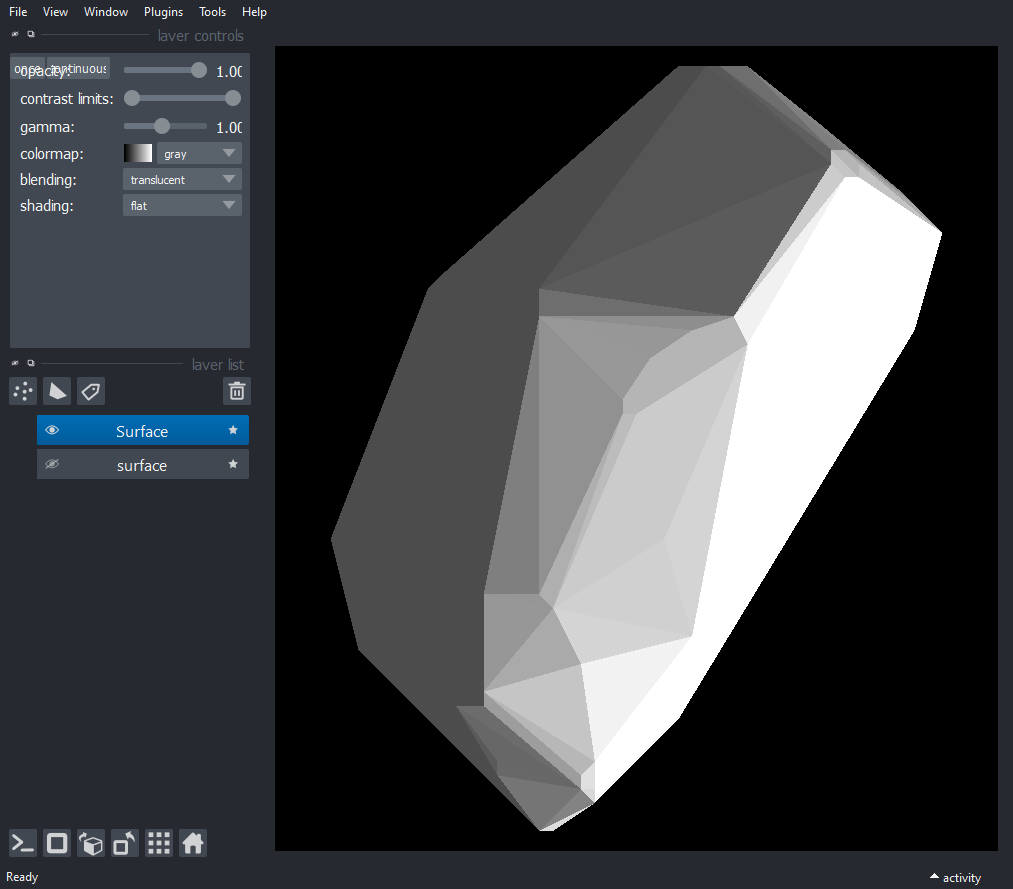

In [4]:
hide_all(viewer)

surface_layer = viewer.add_surface(
    convex_hull(surface=surface), 
    blending='translucent', shading='flat')

nbscreenshot(viewer)

### Smoothing a surface using Taubin's method

Alternative shading modes are only available in 3D, defaulting to none


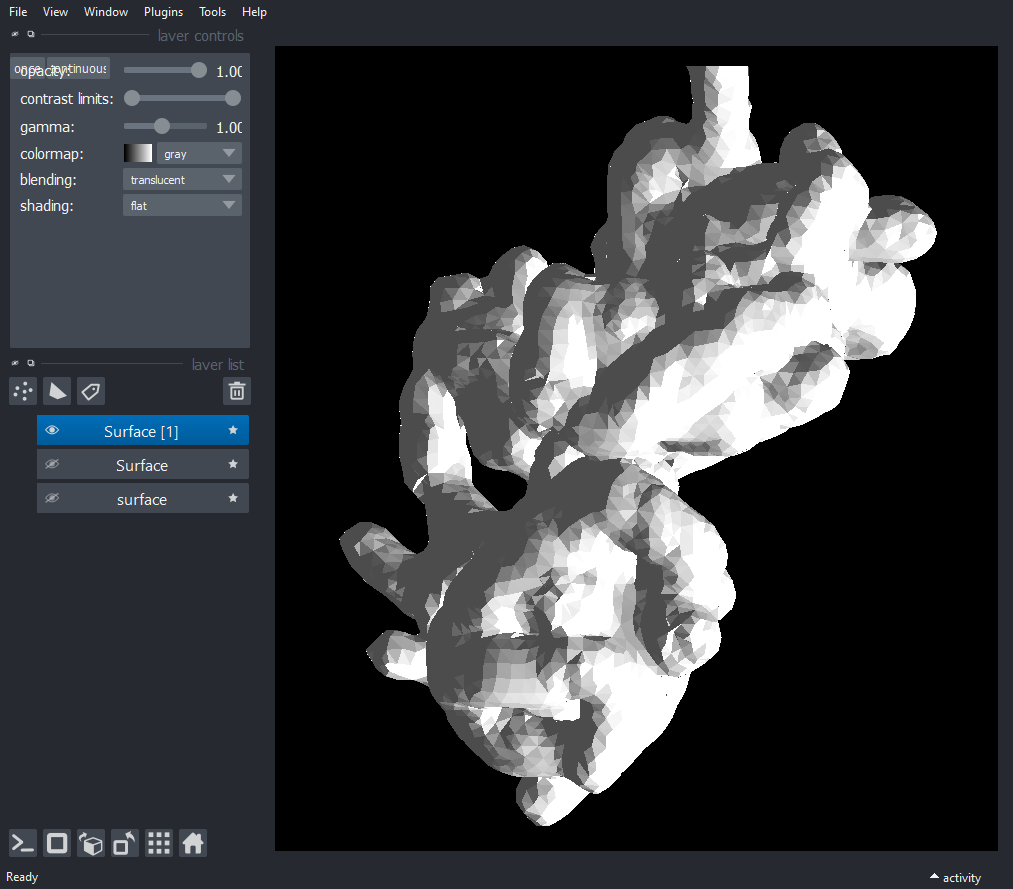

In [5]:
hide_all(viewer)

taubin_surface_layer = viewer.add_surface(taubin_smooth(surface))

nbscreenshot(viewer)

### Simplifying meshes using clustering decimation

Alternative shading modes are only available in 3D, defaulting to none


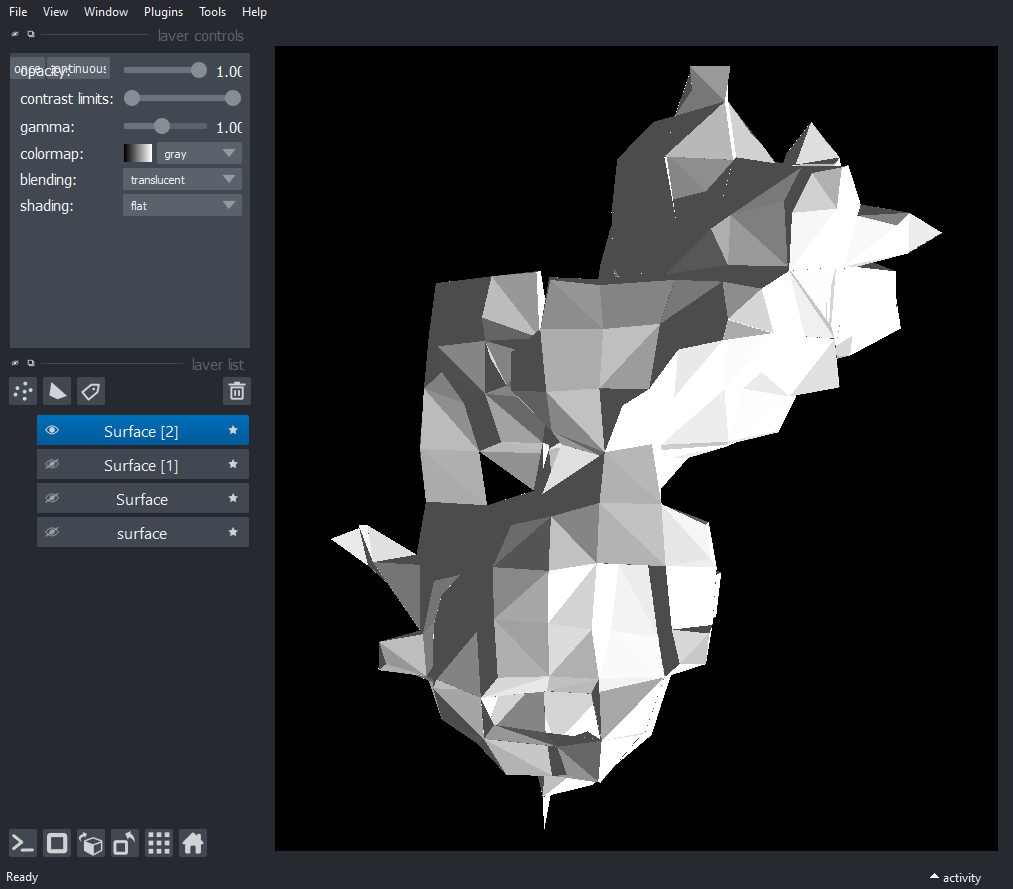

In [6]:
hide_all(viewer)

surface_layer = viewer.add_surface(simplification_clustering_decimation(
                                    surface, threshold_percentage=5))

nbscreenshot(viewer)

### Smoothing a surface using Laplacian

Alternative shading modes are only available in 3D, defaulting to none


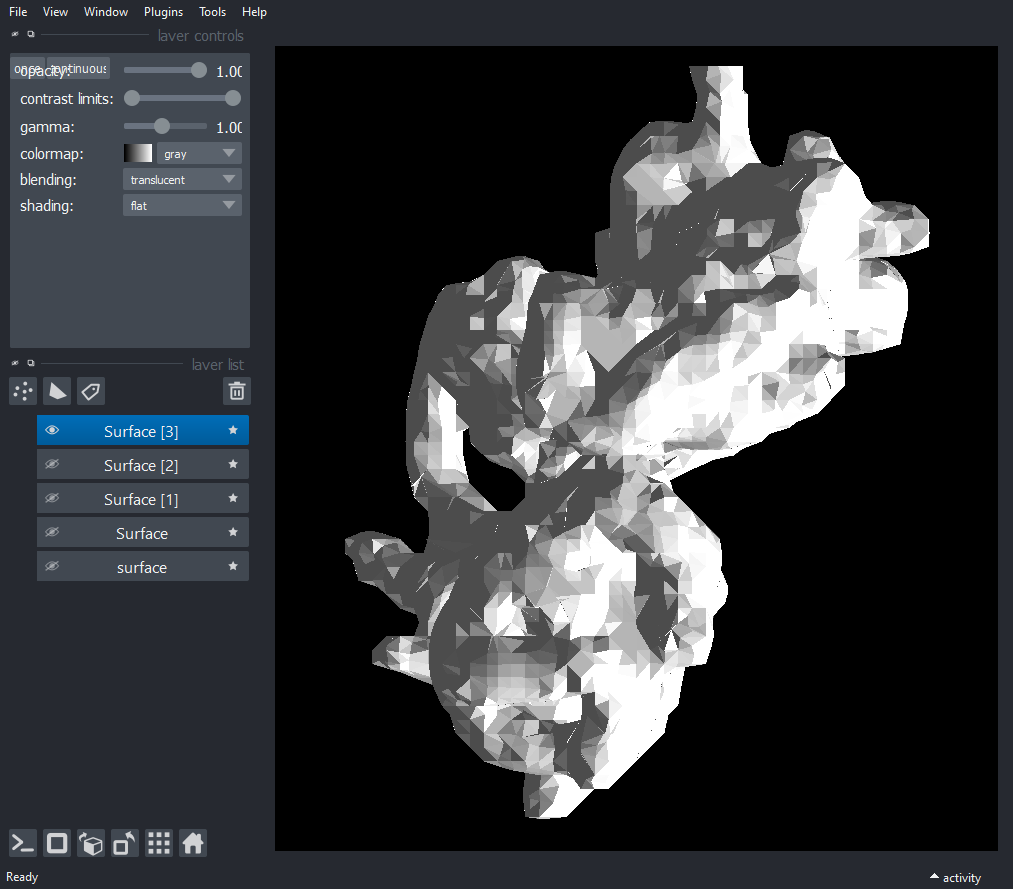

In [7]:
hide_all(viewer)

laplacian_surface_layer = viewer.add_surface(laplacian_smooth(
                                surface, step_smooth_num=5))

nbscreenshot(viewer)

### Visualizing Gaussian curvature

Alternative shading modes are only available in 3D, defaulting to none


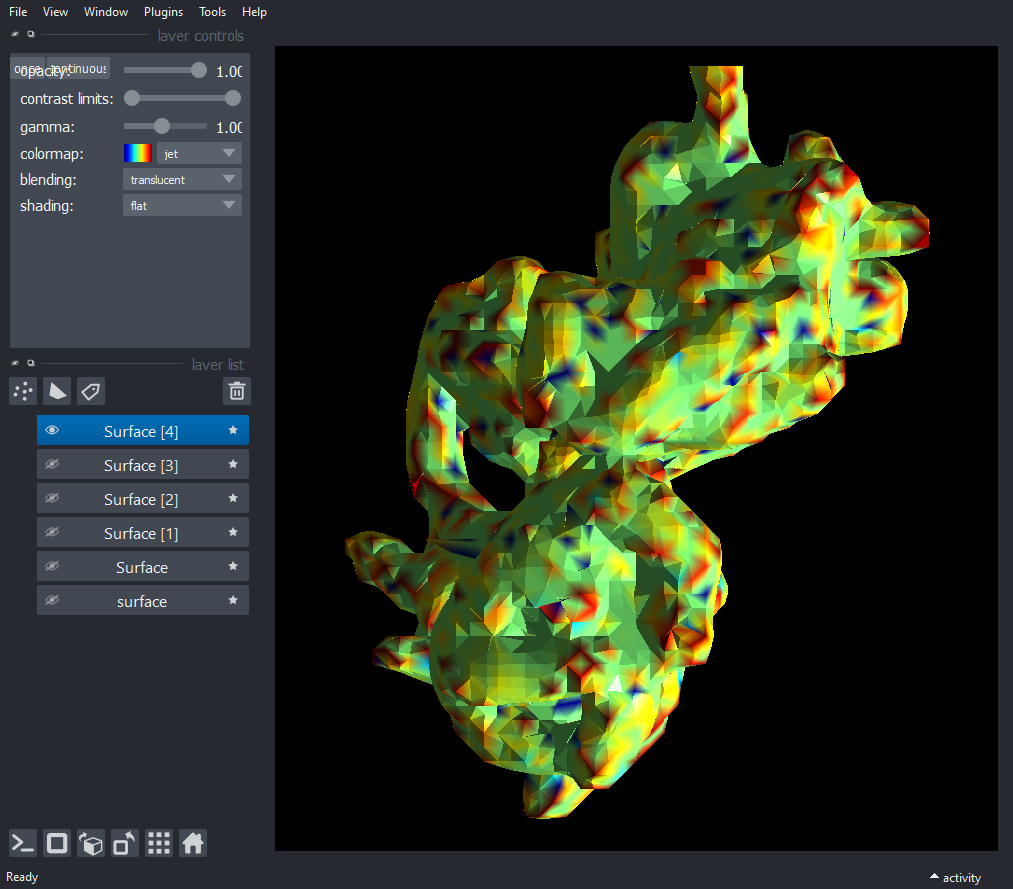

In [8]:
hide_all(viewer)

colored_surface_layer = viewer.add_surface(colorize_curvature_apss(
    laplacian_surface_layer.data), colormap='jet')

nbscreenshot(viewer)

Alternative shading modes are only available in 3D, defaulting to none


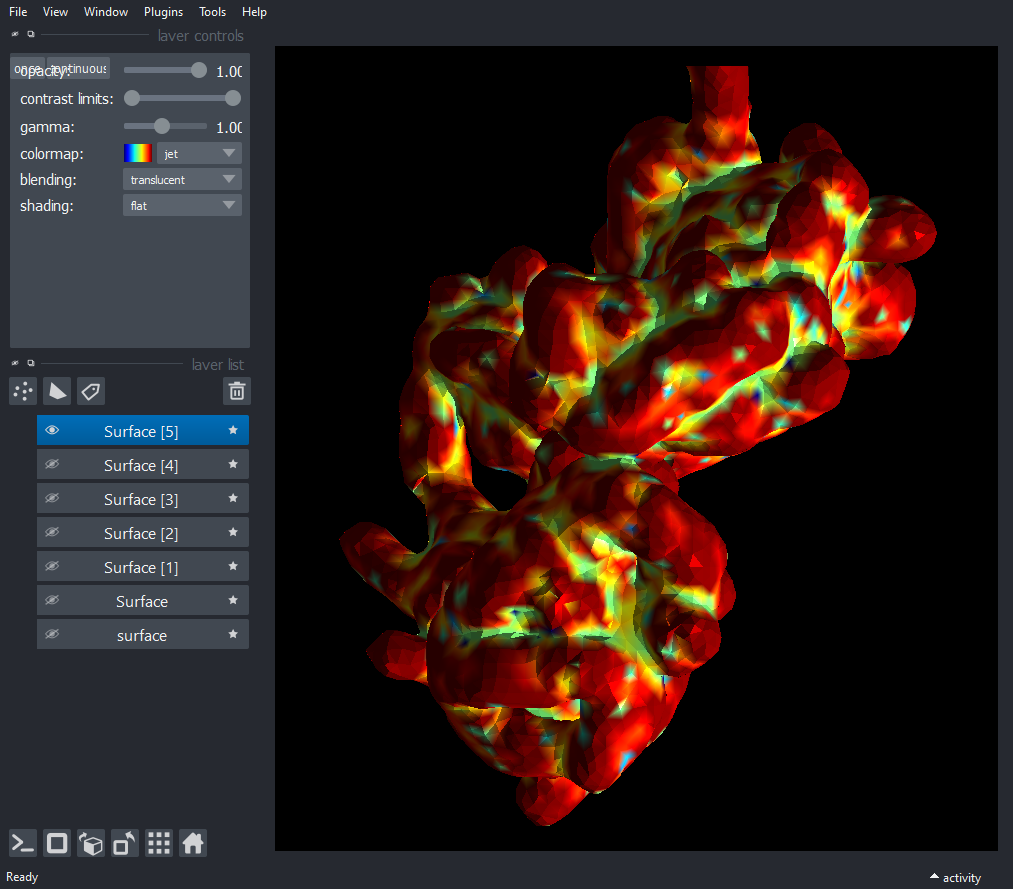

In [9]:
hide_all(viewer)

colored_surface_layer = viewer.add_surface(colorize_curvature_apss(
    taubin_surface_layer.data), colormap='jet')

nbscreenshot(viewer)

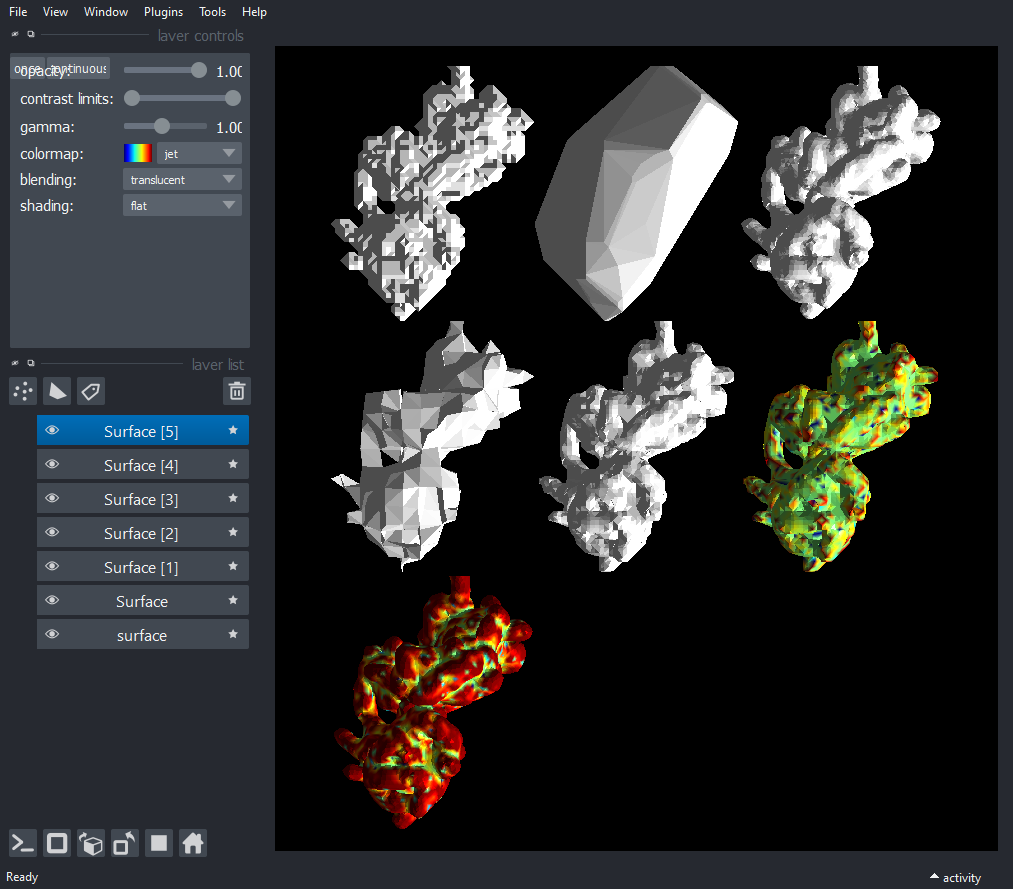

In [10]:
show_all(viewer)

viewer.grid.enabled = True
viewer.grid.stride = -1

nbscreenshot(viewer)